In [7]:
%pip install seaborn
import seaborn 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset from CSV
dataset = pd.read_csv("HousePricePrediction.csv")

# Print the first 5 records of the dataset
print(dataset.head(5))

# If you want to save it again as a CSV (not usually needed unless modified)
dataset.to_csv("HousePricePrediction.csv", index=False)

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [9]:
# Print the first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [10]:
dataset.shape  #Initial Exploration: #DATAFFRAMA PANDAS STEP#
#The first step in understanding any dataset is to know its size. Knowing how many rows and columns are present helps you get a quick overview of the dataset's scale and complexity.
#Data Quality Checks:
#Missing Values: If the dataset has fewer rows than expected or seems too small, it might indicate missing data or errors during data collection.
#Outliers: For very large datasets, there could be redundant or duplicate data points that can affect your model performance.

(2919, 13)

In [11]:
#######DATA PROCEESSRING##################
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

#This prints the number of columns that are of type object, which typically represent categorical variables in the dataset.

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


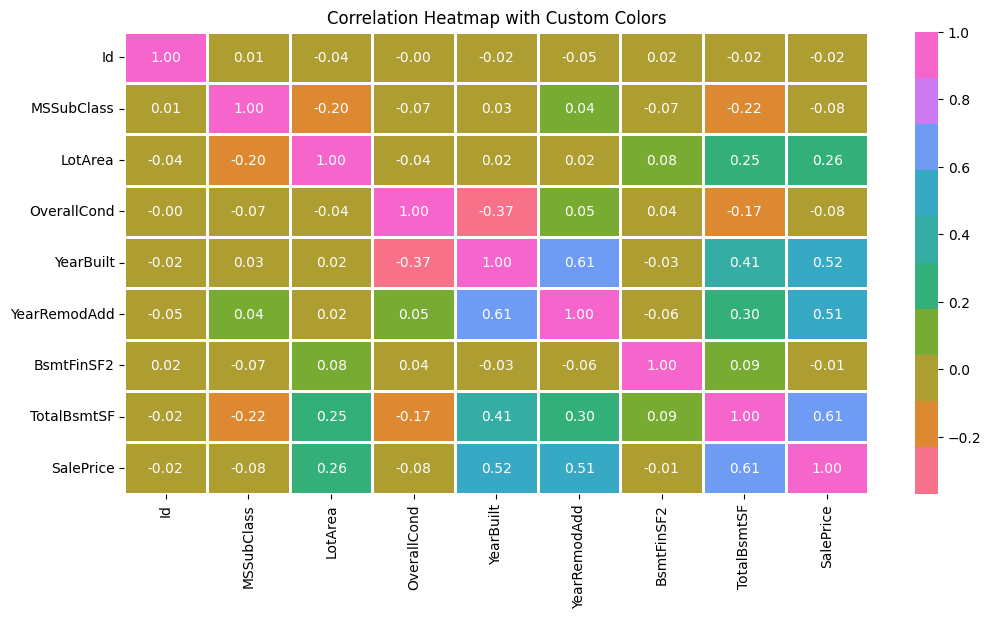

In [12]:
#####################DATA ANALYSIS################### Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

# Create a color palette for the heatmap
colors = sns.color_palette("husl", 10)  # Generate a list of distinct colors

# Create a custom colormap from the selected colors
custom_cmap = sns.color_palette(colors, as_cmap=True)
#rows: The number of data points or samples (observations) in the dataset.
#columns: The number of features or variables (attributes) in the dataset.
# This computes the correlation matrix of the numerical features in numerical_dataset. The result is a square matrix where each cell at (i, j) contains the correlation coefficient between the i-th and j-th features.
# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
             cmap=custom_cmap,  # Use the custom colormap
             fmt='.2f',
             linewidths=2,
             annot=True)
plt.title('Correlation Heatmap with Custom Colors')
plt.show() #Checking the relationships between variables to understand how they might affect each other. This includes computing correlation coefficients and creating correlation matrices.#

In [13]:
#The colors in the heatmap represent the strength and direction of the correlation between variables.
#"with Coolwarm Colors": This part describes the color scheme used in the heatmap. Mentioning the color scheme informs viewers that the color gradient runs from cool (blue for negative correlations) to warm (red for positive correlations). It helps set expectations about how to read the heatmap: cooler colors indicate negative relationships, while warmer colors indicate positive relationships.
#Red indicates a positive correlation: As one variable increases, the other variable also tends to increase.

#Blue indicates a negative correlation: As one variable increases, the other variable tends to decrease.

#Lighter shades indicate a weaker correlation, while darker shades indicate a stronger correlation.
#The correlation between 'TotalBsmtSF' and 'SalePrice' is 0.61, meaning they are highly correlated.

#The color scale is centered around 0, where white represents no correlation. The correlation values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).#

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

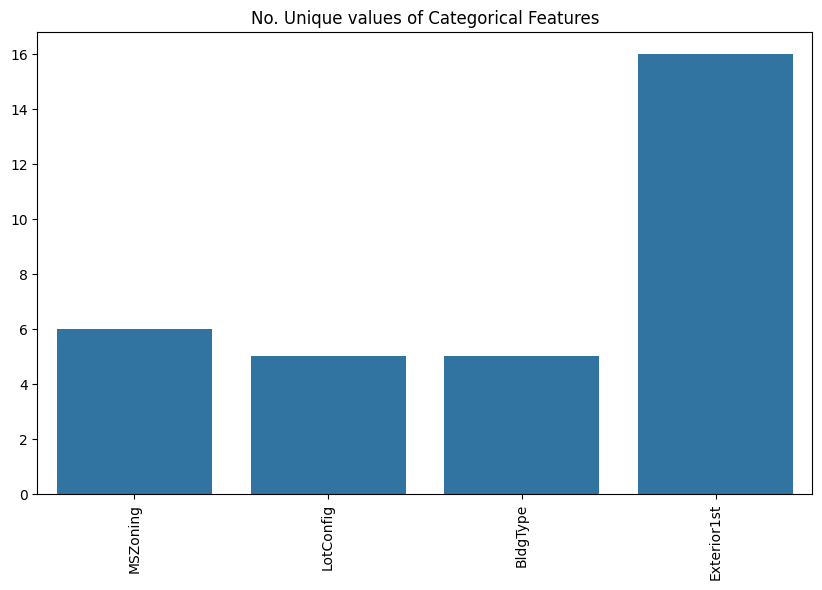

In [14]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [15]:
#Visualization Type: This code creates a single bar plot showing the number of unique values for each categorical feature.
#Purpose: It provides a summary view of how many distinct categories exist in each categorical feature, which helps in understanding the diversity of data across features.

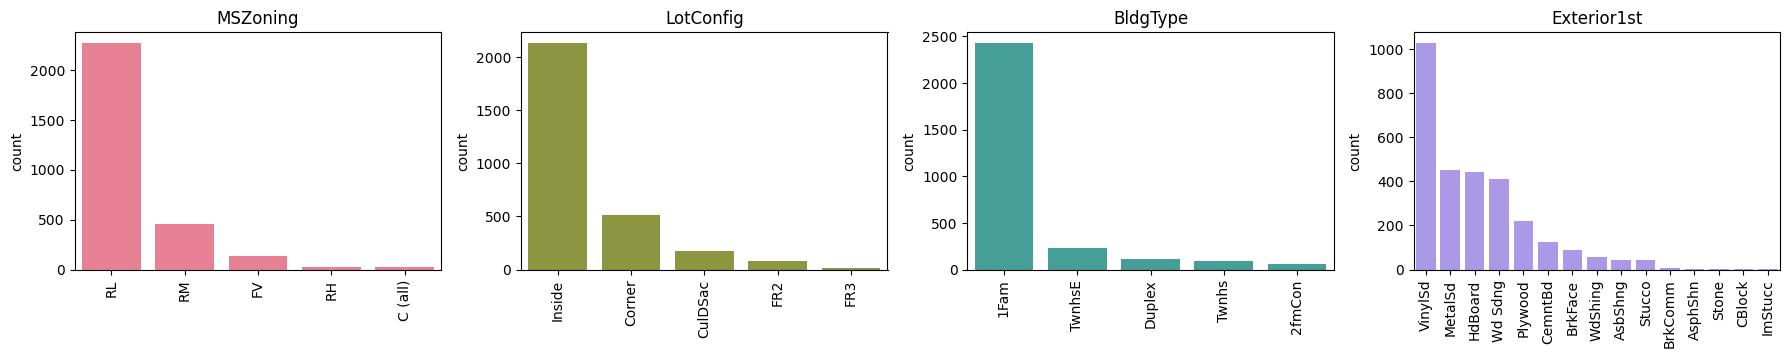

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy for generating random colors

plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

# Generate a color palette with distinct colors
colors = sns.color_palette("husl", len(object_cols))  # You can choose different color palettes

for col, color in zip(object_cols, colors):
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y, color=color)  # Set the color for each bar plot
    plt.title(col)  # Optional: add the column name as the title for each subplot
    index += 1

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#Visualization Type: This code generates multiple bar plots (subplots) for each categorical feature, showing the distribution of the values within each feature.
#Purpose: It details how many times each category occurs within each categorical feature, providing insight into the frequency distribution and the nature of each feature's values.

In [17]:
#This code snippet effectively visualizes the distribution of each categorical feature in the dataset through individual bar plots for each feature. The process includes:

#Creating a large figure to accommodate multiple subplots.
#Setting a title to provide context for the visualizations.
#Rotating the x-axis labels for improved readability.
#Iteratively generating bar plots for each categorical feature, displaying the counts of unique values.
#The resulting visualization helps in understanding the frequency distribution of categories within each categorical variable, which can be valuable for exploratory data analysis and feature selection.

In [18]:
#We can easily delete the column/row (if the feature or record is not much important).
#Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
###DATA CLEANING###

In [19]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [20]:
#OneHotEncoder – For Label categorical features
#Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [21]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 
new_dataset = dataset.dropna()
new_dataset.isnull().sum()
#Checking features which have null values in the new dataframe (if there are still any).
#Replacing SalePrice empty values with their mean values to make the data distribution symmetric.
#As Id Column will not be participating in any prediction. So we can Drop it.

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [30]:
#One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [31]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [32]:
##By calculating MAPE, you can assess how well the SVR model is generalizing on unseen data (X_valid). Lower values of MAPE indicate better performance, and it helps you compare this regression model with others in terms of predictive accuracy.

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply the OneHotEncoder on the categorical columns
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))

# Ensure the indices of the encoded dataframe match the original dataset
OH_cols.index = new_dataset.index

# Optionally, if you want to drop the original categorical columns and add the encoded ones back
new_dataset_encoded = new_dataset.drop(object_cols, axis=1)
new_dataset_encoded = pd.concat([new_dataset_encoded, OH_cols], axis=1)

print(new_dataset_encoded.head())

   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0          60     8450            5       2003          2003         0.0   
1          20     9600            8       1976          1976         0.0   
2          60    11250            5       2001          2002         0.0   
3          70     9550            5       1915          1970         0.0   
4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice    0    1  ...   20   21   22   23   24   25   26  \
0        856.0   208500.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       1262.0   181500.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2        920.0   223500.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3        756.0   140000.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4       1145.0   250000.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    27   28   29  
0  1.0  0.0  0.0  
1  0.0  0.0  0.0  
2  1.0  0.0

In [26]:
#Splitting Dataset into Training and Testing
# X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [27]:
#SVM – Support vector Machine


In [ ]:
#By calculating MAPE, you can assess how well the SVR model is generalizing on unseen data (X_valid). Lower values of MAPE indicate better performance, and it helps you compare this regression model with others in terms of predictive accuracy.

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv("HousePricePrediction.csv")

# Define features (X) and target (y)
X = dataset.drop("SalePrice", axis=1)  # Replace "SalePrice" with your actual target column name
y = dataset["SalePrice"]  # The target column

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)

Training set shape: (2335, 12) (2335,)
Validation set shape: (584, 12) (584,)


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
dataset = pd.read_csv("HousePricePrediction.csv")

# Check for NaN values in the target variable
print("NaN values in target variable:", dataset["SalePrice"].isnull().sum())

# Remove rows where the target variable is NaN
dataset = dataset[dataset["SalePrice"].notna()]

# Define features (X) and target (y)
X = dataset.drop("SalePrice", axis=1)  # Replace "SalePrice" with your actual target column name
y = dataset["SalePrice"]  # The target column

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Create a preprocessor with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with preprocessing and model
model_RFR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, random_state=42))
])

# Fit the model
model_RFR.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model_RFR.predict(X_valid)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_valid, y_pred) * 100  # Convert to percentage
print("Mean Absolute Percentage Error (MAPE):", mape)

NaN values in target variable: 1459
Mean Absolute Percentage Error (MAPE): 14.66386457700338


In [ ]:
#Random Forest Regression
#Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.
#A random forest is an ensemble learning method that combines the predictions from multiple decision trees to produce a more accurate and stable prediction. It is a type of supervised learning algorithm that can be used for both classification and regression tasks.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
dataset = pd.read_csv("HousePricePrediction.csv")

# Check for NaN values in the target variable
print("NaN values in target variable:", dataset["SalePrice"].isnull().sum())

# Remove rows where the target variable is NaN
dataset = dataset[dataset["SalePrice"].notna()]

# Define features (X) and target (y)
X = dataset.drop("SalePrice", axis=1)  # Replace "SalePrice" with your actual target column name
y = dataset["SalePrice"]  # The target column

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Create a preprocessor with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with preprocessing and model
model_RFR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, random_state=42))
])

# Fit the model
model_RFR.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model_RFR.predict(X_valid)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_valid, y_pred) * 100  # Convert to percentage
print("Mean Absolute Percentage Error (MAPE):", mape)

NaN values in target variable: 1459
Mean Absolute Percentage Error (MAPE): 14.66386457700338


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
dataset = pd.read_csv("HousePricePrediction.csv")

# Remove rows with NaN in the target variable
dataset = dataset[dataset["SalePrice"].notna()]

# Define features (X) and target (y)
X = dataset.drop("SalePrice", axis=1)  # Replace "SalePrice" with your actual target column name
y = dataset["SalePrice"]  # The target column

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Create a preprocessor with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create a pipeline with preprocessing and model
model_RFR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, random_state=42))
])

# Fit the model
model_RFR.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model_RFR.predict(X_valid)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_valid, y_pred) * 100  # Convert to percentage
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 14.66386457700338


In [61]:
#Linear Regression
#Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc. 

In [ ]:
#CatBoost Classifier
#CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library. To read more about CatBoost
#

In [1]:
%pip install ipywidgets

In [6]:
#Clearly, the SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models (approximately 0.18). To achieve even better results, ensemble learning techniques like Bagging and Boosting can also be considered.


In [ ]:
# CatBoost Classifier
# CatBoost is a machine learning algorithm implemented by Yandex and is open-source.
# It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow.
# Performance, ease-of-use, and robustness are the main advantages of the CatBoost library.
# To read more about CatBoost refer to the official documentation.

# Install the CatBoost package
%pip install catboost==0.26

# Import necessary libraries
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Assuming X_train, Y_train, X_valid, and Y_valid are already defined
# Fit the CatBoost regressor model
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)

# Make predictions on the validation set
preds = cb_model.predict(X_valid)

# Calculate R² score
cb_r2_score = r2_score(Y_valid, preds)

# Output the R² score
cb_r2_score
